# ピーターと狼: 強化学習入門

このチュートリアルでは、経路探索の問題に強化学習を適用する方法を学びます。この設定は、ロシアの作曲家[セルゲイ・プロコフィエフ](https://en.wikipedia.org/wiki/Sergei_Prokofiev)による音楽童話[ピーターと狼](https://en.wikipedia.org/wiki/Peter_and_the_Wolf)に触発されています。この物語は、若き開拓者ピーターが勇敢にも家を出て、森の空き地で狼を追いかける話です。私たちは、ピーターが周囲を探索し、最適なナビゲーションマップを作成するのを助ける機械学習アルゴリズムを訓練します。

まずは、便利なライブラリをいくつかインポートしましょう:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## 強化学習の概要

**強化学習** (RL) は、多くの実験を通じて、ある**環境**内での**エージェント**の最適な行動を学習するための学習手法です。この環境内のエージェントは、**報酬関数**によって定義された何らかの**目標**を持つ必要があります。

## 環境

簡単のために、ピーターの世界を `幅` x `高さ` のサイズを持つ正方形のボードと考えましょう。このボードの各セルは以下のいずれかになります：
* **地面** - ピーターや他の生物が歩ける場所
* **水** - 当然ながら歩けない場所
* **木** または **草** - 休むことができる場所
* **リンゴ** - ピーターが見つけて食べると嬉しいもの
* **オオカミ** - 危険で避けるべきもの

この環境を操作するために、`Board` というクラスを定義します。このノートブックが煩雑にならないように、ボードを操作するためのすべてのコードは、別の `rlboard` モジュールに移動しました。これを今インポートします。このモジュールの内部実装について詳しく知りたい場合は、中を確認してみてください。


さあ、ランダムなボードを作成して、その見た目を確認してみましょう:


In [4]:
# code block 1

## アクションとポリシー

この例では、ピーターの目標はリンゴを見つけることであり、オオカミやその他の障害物を避けることです。これらのアクションを辞書として定義し、それらを対応する座標の変化のペアにマッピングします。


In [5]:
# code block 2

エージェント（Peter）の戦略は、いわゆる**ポリシー**によって定義されます。ここでは、最も単純なポリシーである**ランダムウォーク**について考えてみましょう。

## ランダムウォーク

まずは、ランダムウォーク戦略を実装して問題を解決してみましょう。


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## 報酬関数

ポリシーをより賢くするためには、どの動きが他より「良い」のかを理解する必要があります。


In [8]:
#code block 5

## Q-ラーニング

Q-テーブル、または多次元配列を作成します。ボードのサイズが `width` x `height` であるため、Q-テーブルは形状が `width` x `height` x `len(actions)` のnumpy配列で表現できます:


In [9]:
# code block 6

Q-テーブルを`plot`関数に渡して、ボード上でテーブルを視覚化します。


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Q-Learningの本質: ベルマン方程式と学習アルゴリズム

学習アルゴリズムの疑似コードを記述します:

* すべての状態と行動に対して、Q-テーブルQを同じ値で初期化する
* 学習率 $\alpha\leftarrow 1$ を設定する
* シミュレーションを何度も繰り返す
   1. ランダムな位置から開始する
   1. 以下を繰り返す
        1. 状態 $s$ で行動 $a$ を選択する
        2. 行動を実行して新しい状態 $s'$ に移動する
        3. ゲーム終了条件に達するか、総報酬が非常に小さい場合はシミュレーションを終了する  
        4. 新しい状態で報酬 $r$ を計算する
        5. ベルマン方程式に従ってQ関数を更新する: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$ とする
        7. 総報酬を更新し、$\alpha$ を減少させる

## 探索 vs. 活用

最善のアプローチは、探索と活用のバランスを取ることです。環境について学習が進むにつれて、最適なルートを選択する可能性が高くなりますが、時折未探索の道を選ぶことも重要です。

## Pythonによる実装

これで学習アルゴリズムを実装する準備が整いました。その前に、Q-テーブル内の任意の数値を対応する行動の確率ベクトルに変換する関数が必要です:


In [10]:
# code block 7

元のベクトルに少量の `eps` を加えることで、初期状態でベクトルのすべての成分が同一の場合にゼロでの除算を回避します。

実際の学習アルゴリズムは、**エポック**とも呼ばれる5000回の実験を実行します:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

このアルゴリズムを実行した後、Qテーブルは各ステップでのさまざまな行動の魅力を定義する値で更新されるはずです。ここでテーブルを視覚化してください:


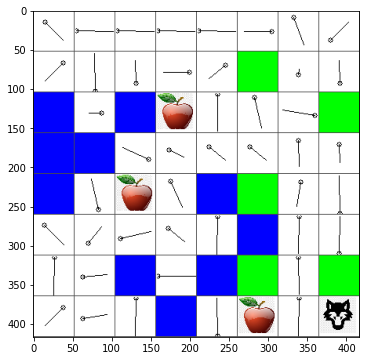

In [43]:
m.plot(Q)

## ポリシーの確認

Q-Tableは各状態における各アクションの「魅力」を示しているため、これを使って効率的なナビゲーションを定義するのは非常に簡単です。最も単純な場合、Q-Tableの値が最も高いアクションを選択するだけで済みます。


In [13]:
# code block 9

2

コードを何度か試してみると、時々「動かなくなる」ことがあり、ノートブックのSTOPボタンを押して中断する必要があることに気付くかもしれません。

> **タスク 1:** `walk`関数を修正して、パスの最大長を一定のステップ数（例えば100）に制限してください。そして、上記のコードが時々この値を返すのを確認してください。

> **タスク 2:** `walk`関数を修正して、以前に訪れた場所には戻らないようにしてください。これにより、`walk`がループするのを防ぐことができますが、エージェントが脱出できない場所に「閉じ込められる」可能性は依然としてあります。


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


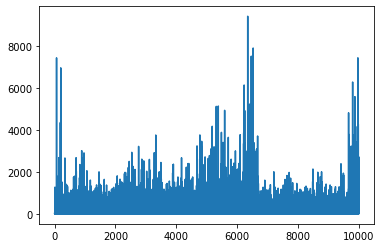

In [57]:
plt.plot(lpath)

## 演習
## より現実的な「ピーターと狼」の世界



---

**免責事項**:  
この文書は、AI翻訳サービス [Co-op Translator](https://github.com/Azure/co-op-translator) を使用して翻訳されています。正確性を追求しておりますが、自動翻訳には誤りや不正確さが含まれる可能性があります。元の言語で記載された原文が正式な情報源と見なされるべきです。重要な情報については、専門の人間による翻訳を推奨します。この翻訳の使用に起因する誤解や誤認について、当社は一切の責任を負いません。
